# GENAI WITH PYTHON

###### Article()

### OCR

pages: 96


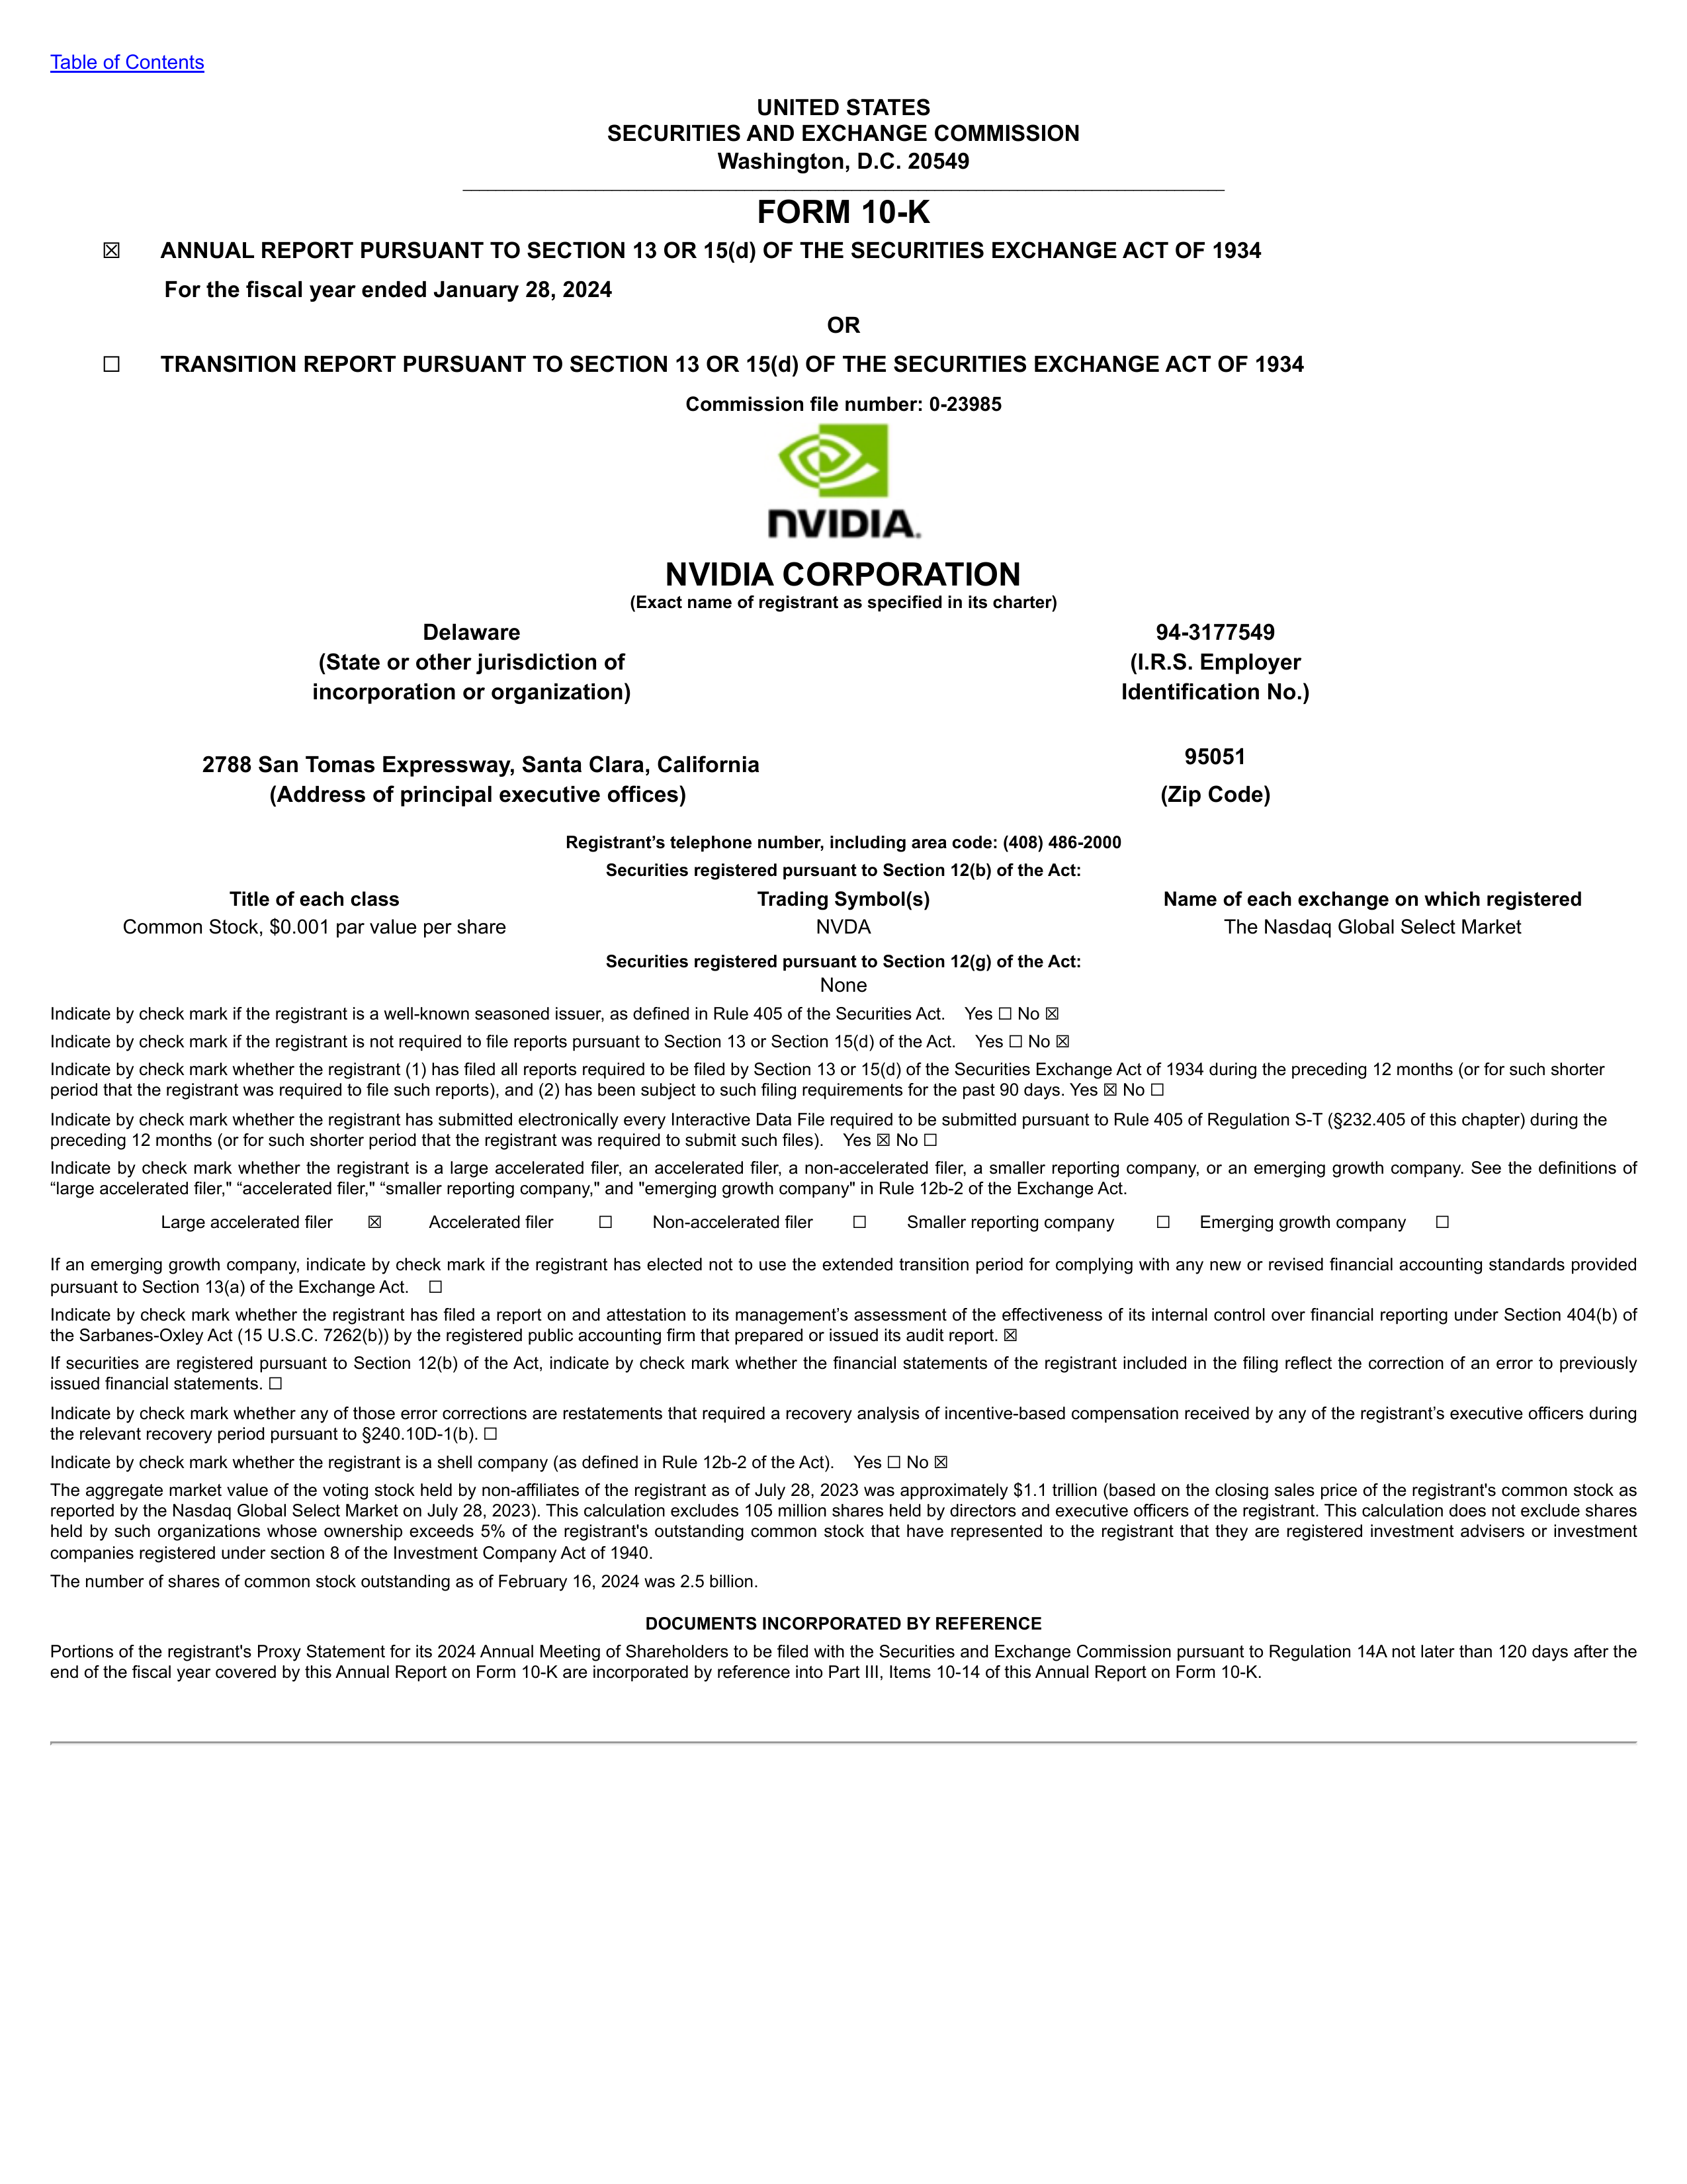

In [1]:
#conda install -c conda-forge poppler
import pdf2image #1.17.0

doc_img = pdf2image.convert_from_path("data/doc_nvidia.pdf", dpi=300)

print("pages:", len(doc_img))
doc_img[0]

In [2]:
import pytesseract #0.3.10
from tqdm.notebook import tqdm

doc_txt = []
for page in tqdm(doc_img):
    text = pytesseract.image_to_string(page)
    doc_txt.append(text)

doc_txt[0]

  0%|          | 0/96 [00:00<?, ?it/s]

'Table of Contents\n\nUNITED STATES\nSECURITIES AND EXCHANGE COMMISSION\nWashington, D.C. 20549\n\nFORM 10-K\n% | ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\n\nFor the fiscal year ended January 28, 2024\n\nOR\nTRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934\n\nCommission file number: 0-23985\n\nNVIDIA.\nNVIDIA CORPORATION\n\n(Exact name of registrant as specified in its charter)\n\nDelaware 94-3177549\n(State or other jurisdiction of (IL.R.S. Employer\nincorporation or organization) Identification No.)\n2788 San Tomas Expressway, Santa Clara, California 95051\n(Address of principal executive offices) (Zip Code)\nRegistrant’s telephone number, including area code: (408) 486-2000\nSecurities registered pursuant to Section 12(b) of the Act:\nTitle of each class Trading Symbol(s) Name of each exchange on which registered\nCommon Stock, $0.001 par value per share NVDA The Nasdaq Global Select Market\n\nSecuri

### Data

In [3]:
title_map = {
    "4-12":"Business",
    "13-33":"Risk Factors",
    "34-44":"Financials",
    "45-46":"Directors",
    "47-83":"Data"
}

In [4]:
lst_docs, lst_ids, lst_metadata = [], [], []
for n,page in enumerate(doc_txt):
    try:
        ## get title
        title = [v for k,v in title_map.items() if n in range(int(k.split("-")[0]), int(k.split("-")[1])+1)][0]
        ## clean page
        page = page.replace("Table of Contents","")
        ## get paragraph
        for i,p in enumerate(page.split('\n\n')):
            if p.strip():
                lst_docs.append(p.strip())
                lst_ids.append(str(n)+"_"+str(i))
                lst_metadata.append({"title":title})
    except:
        continue

print(len(lst_docs), "=", len(lst_ids), "=", len(lst_metadata))

1160 = 1160 = 1160


In [5]:
for id,doc,meta in zip(lst_ids[:3], lst_docs[:3], lst_metadata[:3]):
    print(id, "-", meta, "\n", doc, "\n")

4_1 - {'title': 'Business'} 
 Researchers and developers use our computing solutions to accelerate a wide range of important applications, from simulating molecular dynamics to climate
forecasting. With support for more than 3,500 applications, NVIDIA computing enables some of the most promising areas of discovery, from climate prediction to
materials science and from wind tunnel simulation to genomics. Including GPUs and networking, NVIDIA powers over 75% of the supercomputers on the global
TOP500 list, including 24 of the top 30 systems on the Green500 list. 

4_2 - {'title': 'Business'} 
 Gamers choose NVIDIA GPUs to enjoy immersive, increasingly cinematic virtual worlds. In addition to serving the growing number of gamers, the market for PC
GPUs is expanding because of the burgeoning population of live streamers, broadcasters, artists, and creators. With the advent of generative Al, we expect a
broader set of PC users to choose NVIDIA GPUs for running generative Al applications loc

### LLM Generator

In [10]:
import ollama #0.2.1

def keyword_generator(p, top=3):
    prompt = "summarize the following paragraph in 3 keywords separated by ,: "+p
    res = ollama.generate(model="phi3", prompt=prompt)["response"]
    #lst = [k.replace("\n"," ").strip() for k in res.split(",")][:top]
    #str = ", ".join(lst)
    return res.replace("\n"," ").strip()

p = '''Professional artists, architects and designers use NVIDIA partner products accelerated with our GPUs and software platform for a range of creative and design
use cases, such as creating visual effects in movies or designing buildings and products. In addition, generative Al is expanding the market for our workstation-
class GPUs, as more enterprise customers develop and deploy Al applications with their data on-premises.'''
print(keyword_generator(p))

Creative design, AI integration, NVIDIA acceleration


In [11]:
for i,doc in tqdm(enumerate(lst_docs)):
    lst_metadata[i]["keywords"] = keyword_generator(doc)

0it [00:00, ?it/s]

In [12]:
for id,doc,meta in zip(lst_ids[:3], lst_docs[:3], lst_metadata[:3]):
    print(id, "-", meta, "\n", doc, "\n")

4_1 - {'title': 'Business', 'keywords': 'Computing Solutions, Supercomputing Applications, NVIDIA Dominance'} 
 Researchers and developers use our computing solutions to accelerate a wide range of important applications, from simulating molecular dynamics to climate
forecasting. With support for more than 3,500 applications, NVIDIA computing enables some of the most promising areas of discovery, from climate prediction to
materials science and from wind tunnel simulation to genomics. Including GPUs and networking, NVIDIA powers over 75% of the supercomputers on the global
TOP500 list, including 24 of the top 30 systems on the Green500 list. 

4_2 - {'title': 'Business', 'keywords': 'NVIDIA GPUs, Virtual Reality, Generative AI Applications'} 
 Gamers choose NVIDIA GPUs to enjoy immersive, increasingly cinematic virtual worlds. In addition to serving the growing number of gamers, the market for PC
GPUs is expanding because of the burgeoning population of live streamers, broadcasters, art

### Database

In [6]:
import chromadb #0.5.0

db = chromadb.PersistentClient()
db.list_collections()

[]

In [13]:
collection_name = "nvidia"

if collection_name in [c.name for c in db.list_collections()]:
    db.delete_collection(collection_name)
    print("--- deleted ---")

collection = db.get_or_create_collection(name=collection_name, 
                                         embedding_function=chromadb.utils.embedding_functions.DefaultEmbeddingFunction())

collection.add(documents=lst_docs, ids=lst_ids, metadatas=lst_metadata, 
               images=None, embeddings=None)

collection.peek(1)

--- deleted ---


{'ids': ['10_1'],
 'embeddings': [[-0.047591518610715866,
   0.024682102724909782,
   0.023855814710259438,
   0.005954810418188572,
   0.015420828945934772,
   -0.01788739487528801,
   -0.04011129215359688,
   -0.022446289658546448,
   -0.04171720892190933,
   -0.020844966173171997,
   -0.04196589067578316,
   -0.04655219241976738,
   0.004572858568280935,
   -0.011037970893085003,
   0.04047861322760582,
   0.04321759194135666,
   0.02426465041935444,
   -0.05990944057703018,
   -0.02854069508612156,
   -0.03957819566130638,
   0.010005286894738674,
   -0.0036342227831482887,
   0.061970025300979614,
   -0.0887860357761383,
   0.005217060912400484,
   -0.013864698819816113,
   -0.0550185851752758,
   0.001424842863343656,
   0.020274238660931587,
   0.027130667120218277,
   -0.047183576971292496,
   0.08822397887706757,
   -0.029273172840476036,
   0.048361971974372864,
   0.054405588656663895,
   0.010770195163786411,
   -0.059781644493341446,
   -0.035098761320114136,
   -0.0057298

In [23]:
query = "how much is the revenue?"
collection.query(query_texts=[query])

{'ids': [['78_13',
   '78_7',
   '54_11',
   '54_13',
   '37_1',
   '39_2',
   '35_4',
   '78_12',
   '69_5',
   '70_1']],
 'distances': [[0.3881477117538452,
   0.41459977626800537,
   0.6890628337860107,
   0.7084571123123169,
   0.7561033964157104,
   0.7571808099746704,
   0.7699214816093445,
   0.7703176140785217,
   0.8317533731460571,
   0.8592502474784851]],
 'metadatas': [[{'keywords': 'Sales income, expenditure, profit margin',
    'title': 'Data'},
   {'keywords': 'Revenue Summary, Increasing Trend, Two-Year Data',
    'title': 'Data'},
   {'keywords': 'Sales recognition, revenue timing, financial reporting',
    'title': 'Data'},
   {'keywords': 'Growth, Profitability, Performance Metrics', 'title': 'Data'},
   {'keywords': 'Sales recognition, Deferred revenue, Expense allocation',
    'title': 'Financials'},
   {'keywords': 'Market dominance, income distribution, financial performance',
    'title': 'Financials'},
   {'keywords': 'Fiscal Growth, Increased Revenue, 126% Ris

In [24]:
res_db = collection.query(query_texts=[query])["documents"][0][0:10]
context = ' '.join(res_db).replace("\n", " ")
context

'Total revenue Total revenue $ 60,922 $ 26,974 $ 26,914 Revenue Recognition Product Sales Revenue Revenue Recognition Revenue Allowances Concentration of Revenue Revenue for fiscal year 2024 was $60.9 billion, up 126% from a year ago. Revenue: (In millions) Data Center 47,525 15,005 $ 10,613 Gaming 10,447 9,067 12,462 Professional Visualization 1,553 1,544 2,111 Automotive 1,091 903 566 OEM and Other 306 455 1,162 60,922 26,974 $ 26,914 (2) Deferred revenue primarily includes customer advances and deferrals related to support for hardware and software, license and development arrangements, and cloud services. $233 million and $35 million of the balance in fiscal 2024 and 2023 respectively, related to customer advances. invoiced in future periods. Revenue allocated to remaining performance obligations, which includes deferred revenue and amounts that will be invoiced and recognized as revenue in future periods, was $1.1 billion as of January 28, 2024. We expect to recognize approximatel

### LLM Chat

In [25]:
# Chat with Context only
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using only \
                                                         the folling information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

 The total revenue reported for fiscal year 2024 was $60,922 million (or $60.9 billion). This represents an increase of 126% from the previous year's revenue. Additionally, as of January 28, 2024, there were $1.1 billion allocated to remaining performance obligations which is expected to be recognized over the next twelve months and beyond. It should be noted that this figure excludes revenues related to contracts with a duration of one year or less.


In [26]:
# Chat with knowledge + Context
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

 The total reported revenue for fiscal year 2024 was $60,922 million, which represents an increase of 126% from the previous year's revenue. This figure encompasses various product sales and services offered by the company across different sectors such as Data Center, Gaming, Professional Visualization, Automotive, OEM and Other. Additionally, there is a mention of $233 million in customer advances and deferrals related to future invoicing and revenue recognition.


In [27]:
# Chat Stream
res = ollama.chat(model="phi3", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}],
                  stream=True)
for chunk in res:
    print(chunk["message"]["content"], end="")

 The total revenue reported in the information provided is $60,922 million (or $60.922 billion) for the fiscal year 2024. This represents an increase of 126% from the previous year's revenue. Additionally, there are specific product sales revenues listed as follows: Data Center ($47,525 million), Gaming ($10,447 million), Professional Visualization ($1,553 million), Automotive ($1,091 million), and OEM and Other ($306 million).